In [1]:
import sympy as sp
from sympy import init_printing
init_printing(use_unicode=True)

# Variables

In [2]:
x_2 = sp.symbols('x_2')
x_B = sp.symbols('x_B')
x_Bstar = sp.symbols('x_{B^*}')
x_A = sp.symbols('x_A')

In [3]:
z_2A = sp.symbols('z_{2A}')
z_BA = sp.symbols('z_{BA}')
z_BstarA = sp.symbols('z_{B^*A}')

In [4]:
a_BA = sp.symbols('a_{BA}')
a_BstarA = sp.symbols('a_{B^*A}')
a_2A = sp.symbols('a_{2A}')

In [5]:
b_2 = sp.symbols('b_2')
b_B = sp.symbols('b_B')
b_Bstar = sp.symbols('b_{B^*}')

In [6]:
e_2 = sp.symbols('e_2')
e_B = sp.symbols('e_B')
e_Bstar = sp.symbols('e_{B^*}')

# Relations

\begin{align*}
e_B &= b_{B} x_B \\
e_{B^*} &= b_{B^*} x_{B^*} \\
e_2 &= b_2 x_2 \\
\end{align*}

In [7]:
def expr_b_B():
    return e_B - (b_B * x_B)  # = 0, to be read like this!
def expr_b_Bstar():
    return e_Bstar - (b_Bstar * x_Bstar)
def expr_b_2():
    return e_2 - (b_2 * x_2)

\begin{align*}
a_{2A} &= z_{2A} / x_A \\
a_{BA} &= z_{BA} / x_A \\
a_{B^*A} &= z_{B^*A} / x_A \\
\end{align*}

In [8]:
def expr_a_2A():
    return a_2A - (z_2A / x_A)
def expr_a_BA():
    return a_BA -(z_BA / x_A)
def expr_a_BstarA():
    return a_BstarA - (z_BstarA / x_A)

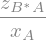

In [9]:
sp.solve(expr_a_BstarA(), a_BstarA)[0]

# Conditions

\begin{align*}
x_B &= x_{B^*} + x_2 \\
z_{BA} &= z_{B^*A} + z_{2A} \\
e_B &= e_{B^*} + e_2 \\
\end{align*}

In [10]:
def cond_prod_x():
    return x_B -(x_Bstar + x_2)
def cond_flow_A_to_B():
    return z_BA - (z_BstarA + z_2A)
def cond_burden_B():
    return e_B - (e_Bstar + e_2)

# Numerical Values

These are the variables that practitioners could know...

In [60]:
# environmental burdens
num_e_2 = 0.2
num_e_B = 1.2
# total annual production of A
num_x_A = 5.0
# total annual flow to A
num_z_2A = 0.4
num_z_BA = 0.7
# total annual production of B and 2
num_x_2 = 0.6
num_x_B = 3.0

In [61]:
def calculate_z_BstarA(z_BstarA):
    num_z_BstarA = sp.solve(cond_flow_A_to_B(), z_BstarA)[0].subs(
        [
            (z_2A, num_z_2A),
            (z_BA, num_z_BA),
        ]
    )
    return num_z_BstarA


def calculate_x_Bstar(x_Bstar):
    num_x_Bstar = sp.solve(cond_prod_x(), x_Bstar)[0].subs(
        [
            (x_B, num_x_B),
            (x_2, num_x_2),
        ]
    )
    return num_x_Bstar

In [62]:
num_z_BstarA = calculate_z_BstarA(z_BstarA)
num_x_Bstar = calculate_x_Bstar(x_Bstar)

In [63]:
num_a_BstarA = num_z_BstarA / num_x_A
num_e_Bstar = num_e_B - num_e_2

In [64]:
num_z_BstarA

In [65]:
num_a_BstarA

In [66]:
num_x_Bstar

In [67]:
num_e_Bstar

# Equation to Test

In [19]:
s_io = sp.symbols('s_{io}')
s_hybrid = sp.symbols('s_{hybrid}')

In [20]:
expr_s_io = s_io - (b_B * a_BA)

In [21]:
sp.solve(expr_s_io, s_io)[0]

In [22]:
expr_s_hybrid = s_hybrid - (b_Bstar * a_BstarA + b_2 * a_2A)

In [23]:
sp.solve(expr_s_hybrid, s_hybrid)[0]

# Testing
## RHS

In [24]:
sp.solve(expr_s_io, s_io)[0]

In [25]:
rhs = expr_s_io.subs(
    [
        (b_B, sp.solve(expr_b_B(), b_B)[0]), # express b in terms of e and x
        (a_BA, sp.solve(expr_a_BA(), a_BA)[0]), # express a in terms of z and x
    ]
)

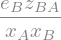

In [26]:
sp.solve(rhs, s_io)[0]

In [68]:
sp.solve(rhs, s_io)[0].subs(
    [
        (e_B, num_e_B),
        (x_A, num_x_A),
        (x_B, num_x_B),
        (z_BA, num_z_BA),
    ]
).simplify()

## LHS

In [28]:
sp.solve(expr_s_hybrid, s_hybrid)[0]

In [29]:
lhs = expr_s_hybrid.subs(
    [
        (b_2, sp.solve(expr_b_2(), b_2)[0]), # express b in terms of e and x
        (a_2A, sp.solve(expr_a_2A(), a_2A)[0]), # express a in terms of z and x
        (b_Bstar, sp.solve(expr_b_Bstar(), b_Bstar)[0]), # express b in terms of e and x
        (a_BstarA, sp.solve(expr_a_BstarA(), a_BstarA)[0]), # express a in terms of z and x
    ]
)

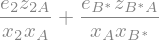

In [30]:
sp.solve(lhs, s_hybrid)[0]

In [69]:
sp.solve(lhs, s_hybrid)[0].subs(
    [
        (e_2, num_e_2),
        (x_A, num_x_A),
        (x_2, num_x_2),
        (z_2A, num_z_2A),
        (z_BstarA, num_z_BstarA),
        (x_Bstar, num_x_Bstar),
        (e_Bstar, num_e_Bstar),
    ]
)